In [1]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [4]:
with open("activity_19010570198.gpx", 'r') as file:
    file=gpxpy.parse(file)
file

GPX(tracks=[GPXTrack(name='Amden Hiking', segments=[GPXTrackSegment(points=[...])])])

In [5]:
file.get_track_points_no()

3442

In [6]:
file.get_elevation_extremes()

MinimumMaximum(minimum=893.7999877929688, maximum=1935.5999755859375)

In [7]:
file.tracks[0].segments[0].points

[GPXTrackPoint(47.16173004359007, 9.146125623956323, elevation=1291.4000244140625, time=datetime.datetime(2025, 5, 3, 6, 42, 29, tzinfo=SimpleTZ('Z'))),
 GPXTrackPoint(47.161716129630804, 9.14619142189622, elevation=1291.199951171875, time=datetime.datetime(2025, 5, 3, 6, 42, 30, tzinfo=SimpleTZ('Z'))),
 GPXTrackPoint(47.1616870444268, 9.146069465205073, elevation=1290.800048828125, time=datetime.datetime(2025, 5, 3, 6, 42, 32, tzinfo=SimpleTZ('Z'))),
 GPXTrackPoint(47.16169483959675, 9.146028310060501, elevation=1290.5999755859375, time=datetime.datetime(2025, 5, 3, 6, 42, 34, tzinfo=SimpleTZ('Z'))),
 GPXTrackPoint(47.16170313768089, 9.145999727770686, elevation=1290.4000244140625, time=datetime.datetime(2025, 5, 3, 6, 42, 35, tzinfo=SimpleTZ('Z'))),
 GPXTrackPoint(47.16170313768089, 9.145999727770686, elevation=1290.4000244140625, time=datetime.datetime(2025, 5, 3, 6, 42, 36, tzinfo=SimpleTZ('Z'))),
 GPXTrackPoint(47.16171411797404, 9.145962512120605, elevation=1290.4000244140625, ti

In [8]:
route_info = []

for track in file.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation
            })

In [46]:
route_df = pd.DataFrame(route_info)
route_df.head()

,latitude,longitude,elevation
0,47.161730,9.146126,1291.400024
1,47.161716,9.146191,1291.199951
2,47.161687,9.146069,1290.800049
3,47.161695,9.146028,1290.599976
4,47.161703,9.146000,1290.400024


Text(0.5, 1.0, 'Route latitude and longitude points')

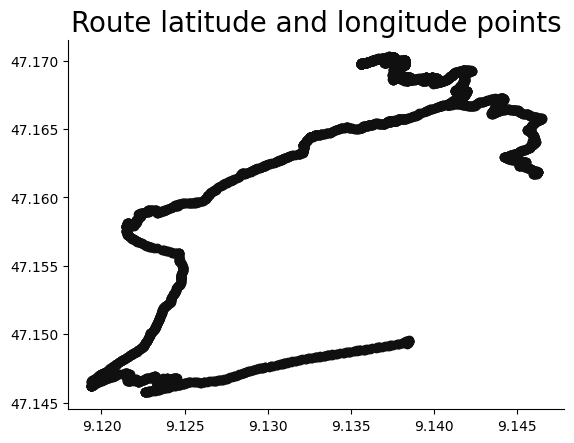

In [10]:
plt.figure()
plt.scatter(route_df['longitude'], route_df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20)

Scale color of points based on elevation

In [11]:
elevation=route_df["elevation"].to_numpy()
normElevation=elevation/elevation.max()
normElevation

array([0.66718332, 0.66707996, 0.66687335, ..., 0.46187229, 0.46176896,
       0.46176896])

Text(0.5, 1.0, 'Route latitude and longitude points')

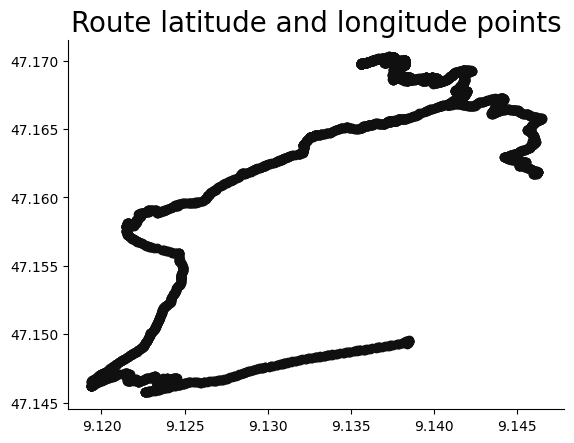

In [12]:
plt.figure()
plt.scatter(route_df['longitude'], route_df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20)

In [93]:
data = zip(route_df['longitude'], route_df['latitude'], route_df['elevation'])

In [83]:
print(list(data))

[(9.146125623956323, 47.16173004359007, 1291.4000244140625), (9.14619142189622, 47.161716129630804, 1291.199951171875), (9.146069465205073, 47.1616870444268, 1290.800048828125), (9.146028310060501, 47.16169483959675, 1290.5999755859375), (9.145999727770686, 47.16170313768089, 1290.4000244140625), (9.145999727770686, 47.16170313768089, 1290.4000244140625), (9.145962512120605, 47.16171411797404, 1290.4000244140625), (9.145970977842808, 47.16173649765551, 1290.5999755859375), (9.146019844338298, 47.1617629006505, 1290.800048828125), (9.146051444113255, 47.16177614405751, 1291.5999755859375), (9.146081199869514, 47.16178435832262, 1291.800048828125), (9.146093521267176, 47.16179081238806, 1292.4000244140625), (9.146119840443134, 47.16179232113063, 1292.800048828125), (9.146138280630112, 47.16178930364549, 1293.4000244140625), (9.14615043438971, 47.16179022565484, 1294.0), (9.146172227337956, 47.161796763539314, 1294.4000244140625), (9.14620173163712, 47.16180304996669, 1295.0), (9.14622251

[Text(0.5, 0, 'longitude [m]'), Text(0, 0.5, 'latitude [m]')]

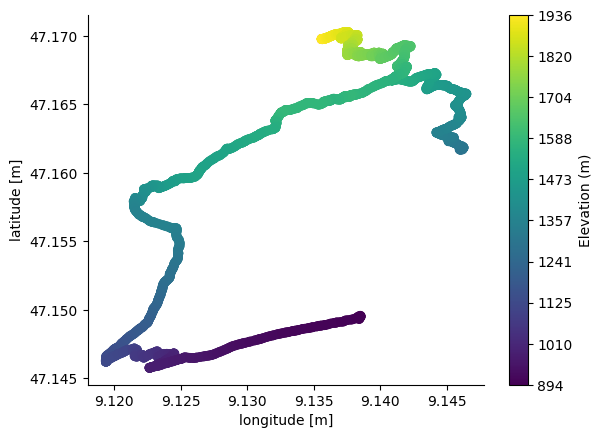

In [132]:
import numpy as np
data = zip(route_df['longitude'], route_df['latitude'], route_df['elevation'])
cmap = plt.colormaps["plasma"]
fig, ax = plt.subplots()
ax.scatter(route_df['longitude'], route_df['latitude'], c=route_df['elevation'])
elev=route_df['elevation'].to_numpy()
plt.colorbar(mappable=plt.cm.ScalarMappable(norm=plt.Normalize(vmin=elev.min(), vmax=elev.max())), ax=ax,label='Elevation (m)',ticks=np.linspace(elev.min(), elev.max(),10))
ax.set(xlabel="longitude [m]", ylabel="latitude [m]")